## Métricas centralidade - parte 1

In [15]:
# import das bibliotecas

import numpy as np
import networkx as nx

import pandas as pd

import matplotlib . pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

### Métricas geométricas de centralidade

### Centralidade de excentricidade

- Considere um grafo $G =(V,E)$ onde $|V| = n$, $|E| = m$.

- Seja $G_i = (V_i,E_i)$ uma componente conexa de $G$ que contém o nó $i \in V$

- A **excentricidade** do nó $i \in G_i$ é a maior distância geodésica de um $i$ aos demais nós de $G_i$. 
- A **excentricidade** do nó $i$ é dado pela fórmula 
$$
ec(i) = \max_{j \in V_i} d(i,j) \; \forall \; i \in V_i
$$
onde $d(i,j)$ é o tamanho da distância geodésica do nó $i$ para o nó $j \in V_i$.

- O **diâmetro** de um grafo é sua maior excentrecidade.

- A **periferia** de um grafo é o conjunto de todos os nós cujo a excentricidade é igual ao diâmetro.

- O **raio** de um grafo é sua menor excentricidade.

- O **centro** de um grafo é o conjunto de nós cujo valor da excentricidade é igual ao raio.

Funções do NetworkX:
- **nx.eccentricity()**: retorna a excentricidade de um grafo.
- **nx.diameter()**: retorna o diâmetro de um grafo.
- **nx.periphery()**: retorna a periferia de um grafo.
- **nx.radius()**: retorna o raio de um grafo.
- **nx.center()**: retorna o centro de um grafo.

In [16]:
# Exemplo de uma arvore binomial
BTG = nx.binomial_tree(4)
n = nx.number_of_nodes(BTG) # número de vértices
m = nx.number_of_edges(BTG) # número de arestas

print("numero de vertices:", n)
print("numero de arestas:", m)

numero de vertices: 16
numero de arestas: 15


In [17]:
## Verifica se o grafo é conexo
print(nx.is_connected(BTG))

True


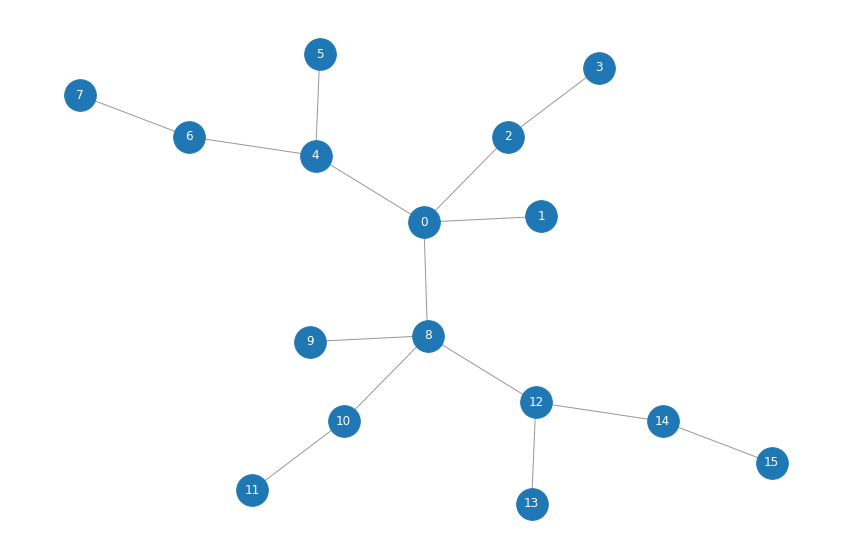

In [18]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
#pos = nx.spring_layout(BTG,seed=123456789,k=0.3)
pos = nx.kamada_kawai_layout(BTG)

# draw edges
nx.draw_networkx_edges(BTG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(BTG,
                               node_size=1000,
                               pos=pos, 
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(BTG, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
#plt.savefig('BTG.png', transparent=True, dpi=300)
plt.show()

In [19]:
# Encontra as distâncias geodésica(sp)
p = nx.shortest_path(BTG)
for key, value in p.items():
    print("sp partindo de",key,":", value)

sp partindo de 0 : {0: [0], 1: [0, 1], 2: [0, 2], 4: [0, 4], 8: [0, 8], 3: [0, 2, 3], 5: [0, 4, 5], 6: [0, 4, 6], 9: [0, 8, 9], 10: [0, 8, 10], 12: [0, 8, 12], 7: [0, 4, 6, 7], 11: [0, 8, 10, 11], 13: [0, 8, 12, 13], 14: [0, 8, 12, 14], 15: [0, 8, 12, 14, 15]}
sp partindo de 1 : {1: [1], 0: [1, 0], 2: [1, 0, 2], 4: [1, 0, 4], 8: [1, 0, 8], 3: [1, 0, 2, 3], 5: [1, 0, 4, 5], 6: [1, 0, 4, 6], 9: [1, 0, 8, 9], 10: [1, 0, 8, 10], 12: [1, 0, 8, 12], 7: [1, 0, 4, 6, 7], 11: [1, 0, 8, 10, 11], 13: [1, 0, 8, 12, 13], 14: [1, 0, 8, 12, 14], 15: [1, 0, 8, 12, 14, 15]}
sp partindo de 2 : {2: [2], 3: [2, 3], 0: [2, 0], 1: [2, 0, 1], 4: [2, 0, 4], 8: [2, 0, 8], 5: [2, 0, 4, 5], 6: [2, 0, 4, 6], 9: [2, 0, 8, 9], 10: [2, 0, 8, 10], 12: [2, 0, 8, 12], 7: [2, 0, 4, 6, 7], 11: [2, 0, 8, 10, 11], 13: [2, 0, 8, 12, 13], 14: [2, 0, 8, 12, 14], 15: [2, 0, 8, 12, 14, 15]}
sp partindo de 3 : {3: [3], 2: [3, 2], 0: [3, 2, 0], 1: [3, 2, 0, 1], 4: [3, 2, 0, 4], 8: [3, 2, 0, 8], 5: [3, 2, 0, 4, 5], 6: [3, 2, 0, 4,

In [20]:
# calculo do tamanhos da distâncias geodésica(sp) do grafo
d = np.zeros((n,n), dtype=int)
for i in BTG:
    for j in BTG:
        d[i][j] = len(p[i][j])-1

#for i in BTG:
#    for j in BTG:
#        if i >= j:
#            continue
#        print("d[%d,%d]=" %(i,j), d[i,j])
d[1][5]

3

In [21]:
# calculo do tamanho das distâncias geodésicas do grafo
d = np.zeros((n,n), dtype=int)
for i in BTG:
    sp = nx.shortest_path_length(BTG,i)

    for key, value in sp.items():
        d[i,key] = value

#d[1][5]

In [22]:
# calculo da excentricidade do grafo
ec = nx.eccentricity(BTG)

for key, value in ec.items():
    print("excentricidade de",key,":", value)

excentricidade de 0 : 4
excentricidade de 1 : 5
excentricidade de 2 : 5
excentricidade de 3 : 6
excentricidade de 4 : 5
excentricidade de 5 : 6
excentricidade de 6 : 6
excentricidade de 7 : 7
excentricidade de 8 : 4
excentricidade de 9 : 5
excentricidade de 10 : 5
excentricidade de 12 : 5
excentricidade de 11 : 6
excentricidade de 13 : 6
excentricidade de 14 : 6
excentricidade de 15 : 7


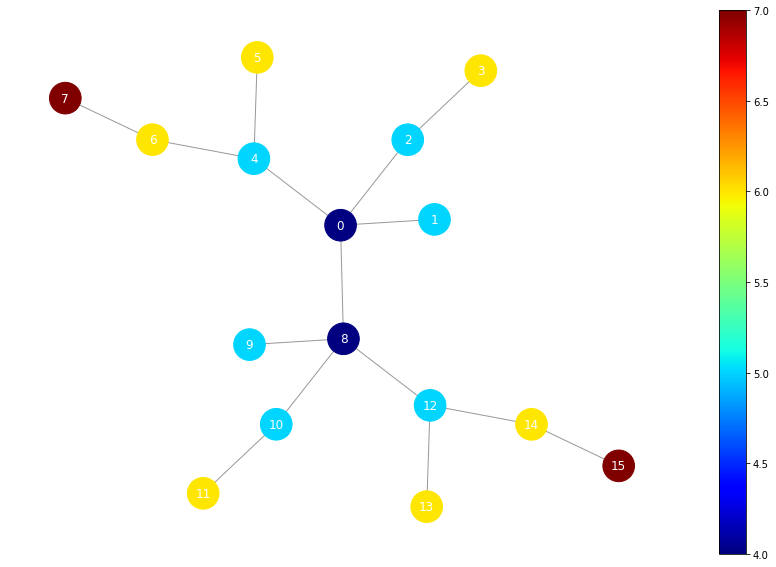

In [23]:
# gráfico da excentricidade do grafo(rede)

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
#pos = nx.spring_layout(BTG,seed=123456789,k=0.3)
pos = nx.kamada_kawai_layout(BTG)

# color of nodes based on eccentricity
color = list(ec.values())

# draw edges
nx.draw_networkx_edges(BTG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(BTG,
                               node_size=1000,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(BTG, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig('excentricidade.png', transparent=True,dpi=300)
plt.show()

In [24]:
set_ec = set(ec.values())
print(set_ec)

for i in set_ec:
    print(i, end= " : ")
    for key, value in ec.items():
        if i == ec[key]:
            print(key, end=", ")
    print()

{4, 5, 6, 7}
4 : 0, 8, 
5 : 1, 2, 4, 9, 10, 12, 
6 : 3, 5, 6, 11, 13, 14, 
7 : 7, 15, 


In [25]:
# the diameter of networks is the maximum eccentricy
diameter = nx.diameter(BTG)
print("Diamentro de G: {}".format(diameter))

Diamentro de G: 7


In [26]:
# whom are in the diameter
diameter_set= [k for k,v in nx.eccentricity(BTG).items() if v == nx.diameter(BTG)]
print("Nós com diametro", diameter,":", diameter_set)

Nós com diametro 7 : [7, 15]


In [27]:
# the periphery of a network is a set of all nodes whose eccentriciy is equals the diameter
periphery = nx.periphery(BTG)
print("Periferia da rede:", periphery)

Periferia da rede: [7, 15]


In [28]:
# the radius of a network is the minimum eccentricity
radius = nx.radius(BTG)
print("Raio da rede: {}".format(radius))

Raio da rede: 4


In [29]:
# whom are in the radius
radius_set = [k for k,v in nx.eccentricity(BTG).items() if v == radius]
print("Nós com raio", radius,":",radius_set)

Nós com raio 4 : [0, 8]


In [30]:
# the center of a network is a set all nodes whose eccentricity equal the radius
center = nx.center(BTG)
print("Centro da rede:", center)

Centro da rede: [0, 8]


- A **centralidade de excentricidade** garante que os nós centrais estão mais próximos dos outros.

- A **centralidade de excentricidade** no nó $i$ é dado pela fórmula
$$
cec(i) = \dfrac{1}{ec(i)} \; \forall \; i \in V_i
$$

In [31]:
# centralidade de excentricidade
cec = {}
for key, value in ec.items():
    cec[key] = 1/value

for key, value in cec.items():
    print("cec(", key, "):", value)

cec( 0 ): 0.25
cec( 1 ): 0.2
cec( 2 ): 0.2
cec( 3 ): 0.16666666666666666
cec( 4 ): 0.2
cec( 5 ): 0.16666666666666666
cec( 6 ): 0.16666666666666666
cec( 7 ): 0.14285714285714285
cec( 8 ): 0.25
cec( 9 ): 0.2
cec( 10 ): 0.2
cec( 12 ): 0.2
cec( 11 ): 0.16666666666666666
cec( 13 ): 0.16666666666666666
cec( 14 ): 0.16666666666666666
cec( 15 ): 0.14285714285714285


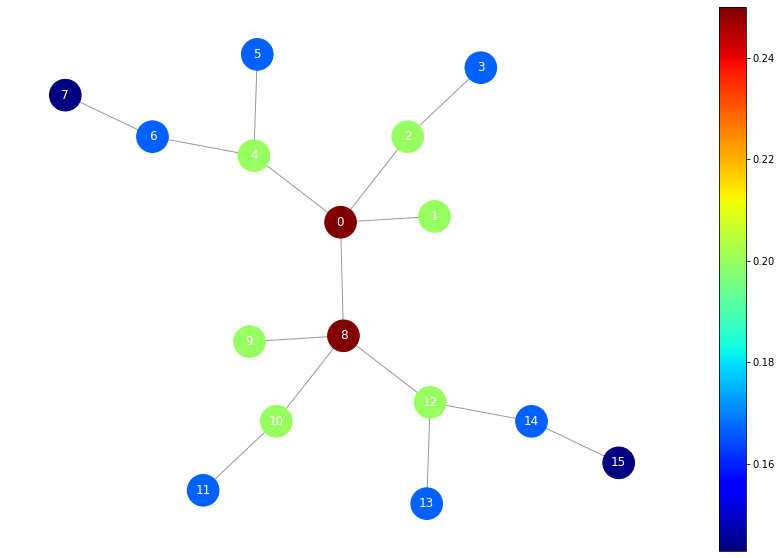

In [32]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
# pos = nx.spring_layout(BTG,seed=123456789,k=0.3)
pos = nx.kamada_kawai_layout(BTG)

# color of nodes
color = list(cec.values())

# draw edges
nx.draw_networkx_edges(BTG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(BTG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(BTG, 
                        pos=pos,
                        font_color='white',
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig('cec.png', transparent=True,dpi=300)
plt.show()

In [33]:
set_ec = set(ec.values())
print(set_ec)

for i in set_ec:
    print(i, end= " : ")
    for key, value in ec.items():
        if i == ec[key]:
            print(key, end=", ")
    print()

{4, 5, 6, 7}
4 : 0, 8, 
5 : 1, 2, 4, 9, 10, 12, 
6 : 3, 5, 6, 11, 13, 14, 
7 : 7, 15, 


### Grau de centralidade

- A métrica de **grau** refere-se ao número de links de cada nó da rede.

- **nx.degree()**: função do networkx que retorna o grau cada nó da rede.

- A métrica de **grau de centralidade** atribui uma pontuação(fração) de importância com base no número de links mantido por cada nó.

- Essa métrica nos fala o quanto direto é a conexão de um nó com os outros nós da rede.

- **nx.degree_centrality()**: função do networkx que retorna o grau de centralidade de cada nó da rede.

In [34]:
# graus dos vertices do grafo(rede)
grau = dict(nx.degree(BTG))
type(grau)
for key, value in grau.items():
    print("Grau do nó", key, ":", value)

Grau do nó 0 : 4
Grau do nó 1 : 1
Grau do nó 2 : 2
Grau do nó 3 : 1
Grau do nó 4 : 3
Grau do nó 5 : 1
Grau do nó 6 : 2
Grau do nó 7 : 1
Grau do nó 8 : 4
Grau do nó 9 : 1
Grau do nó 10 : 2
Grau do nó 12 : 3
Grau do nó 11 : 1
Grau do nó 13 : 1
Grau do nó 14 : 2
Grau do nó 15 : 1


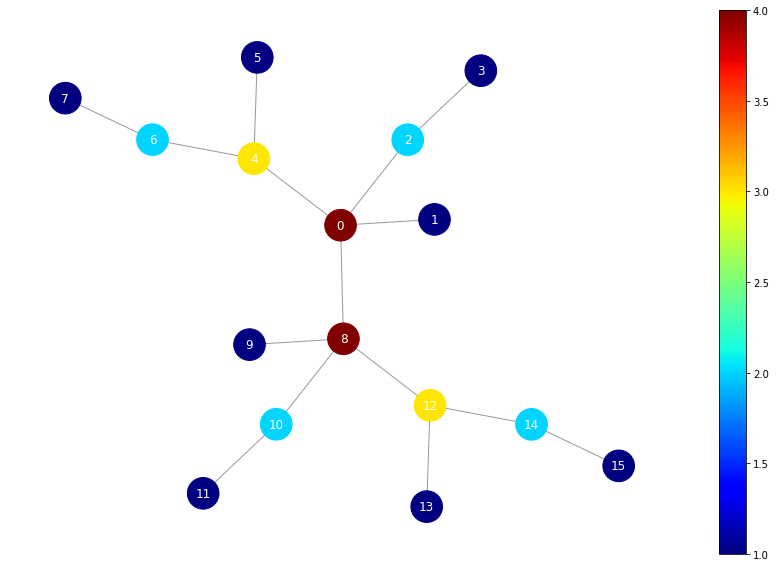

In [35]:
# grau dos nós do grafo(rede)

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
# pos = nx.spring_layout(BTG,seed=123456789,k=0.3)
pos = nx.kamada_kawai_layout(BTG)

# color of nodes
color = list(grau.values())

# draw edges
nx.draw_networkx_edges(BTG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(BTG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(BTG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig('degree.png', transparent=True,dpi=300)
plt.show()

In [36]:
set_grau = set(grau.values())
print(set_grau)

for i in set_grau:
    print(i, end= " : ")
    for key, value in grau.items():
        if i == grau[key]:
            print(key, end=", ")
    print()

{1, 2, 3, 4}
1 : 1, 3, 5, 7, 9, 11, 13, 15, 
2 : 2, 6, 10, 14, 
3 : 4, 12, 
4 : 0, 8, 


In [37]:
# Grau de centrelidade dos vertices do grafo
grau_center = nx.degree_centrality(BTG)

for key, value in grau_center.items():
    print("Grau de centralidade do nó", key, ":", value)

Grau de centralidade do nó 0 : 0.26666666666666666
Grau de centralidade do nó 1 : 0.06666666666666667
Grau de centralidade do nó 2 : 0.13333333333333333
Grau de centralidade do nó 3 : 0.06666666666666667
Grau de centralidade do nó 4 : 0.2
Grau de centralidade do nó 5 : 0.06666666666666667
Grau de centralidade do nó 6 : 0.13333333333333333
Grau de centralidade do nó 7 : 0.06666666666666667
Grau de centralidade do nó 8 : 0.26666666666666666
Grau de centralidade do nó 9 : 0.06666666666666667
Grau de centralidade do nó 10 : 0.13333333333333333
Grau de centralidade do nó 12 : 0.2
Grau de centralidade do nó 11 : 0.06666666666666667
Grau de centralidade do nó 13 : 0.06666666666666667
Grau de centralidade do nó 14 : 0.13333333333333333
Grau de centralidade do nó 15 : 0.06666666666666667


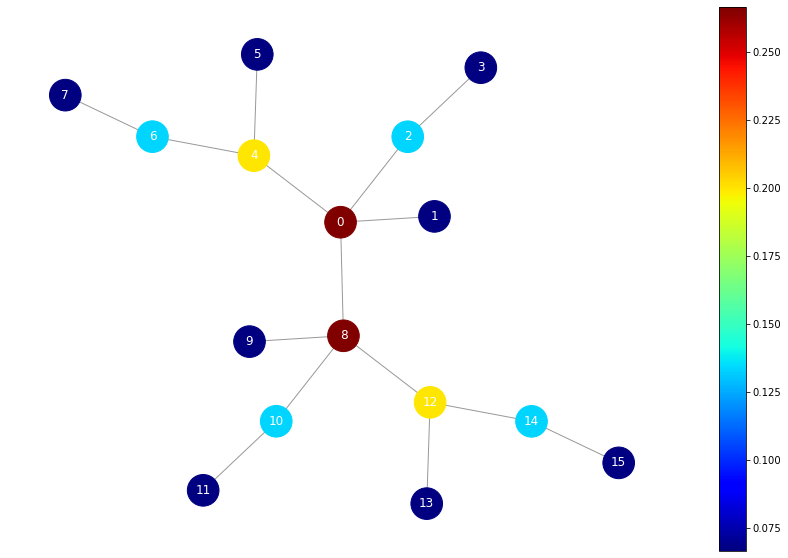

In [38]:
# the degree ceentrality of network(g)

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
# pos = nx.spring_layout(BTG,seed=123456789,k=0.3)
pos = nx.kamada_kawai_layout(BTG)

# color of nodes
color = list(grau_center.values())

# draw edges
nx.draw_networkx_edges(BTG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(BTG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(BTG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig('degree_centrality.png', transparent=True,dpi=300)
plt.show()

In [39]:
set_grau_center = set(grau_center.values())
print("set_grau_center: ", set_grau_center)

for i in set_grau_center:
    print(i, end= " : ")
    for key, value in grau_center.items():
        if i == grau_center[key]:
            print(key, end=", ")
    print()

set_grau_center:  {0.26666666666666666, 0.06666666666666667, 0.13333333333333333, 0.2}
0.26666666666666666 : 0, 8, 
0.06666666666666667 : 1, 3, 5, 7, 9, 11, 13, 15, 
0.13333333333333333 : 2, 6, 10, 14, 
0.2 : 4, 12, 


### Centralidade de proximidade

- A **centralidade de proximidade** pontua cada nó com base em sua **proximidade** com todos os outros nós da rede.

- Esta medida calcula os caminhos mais curtos entre todos os nós e, em seguida, atribui a cada nó uma pontuação com base na soma dos caminhos mais curtos.

- Podemos usar essa medida para encontrar os nós que estão em melhor posição para influenciar toda a rede mais rapidamente.

- A **centralidade de proximidade** do nó $i$ é igual ao reciproco da média aritmética das distâncias geodésicas do nó $i$ para os demais nós $j$ da mesma componente do nó $i$, ou seja
$$
C_{c}(i) = \dfrac{|V_i| - 1}{\sum_{j \in {V_i - \{i\}}} d(i,j)} \; \forall \; i \in V_i
$$

- **nx.closeness_centrality()**: função do networkx que retorna a centralidade de proximidade de cada nó da rede.

In [40]:
# centralidade de proximidade dos vertices de BTG
cc = nx.closeness_centrality(BTG)

for key, value in cc.items():
    print("centralidade de proximidade do nó",key,":", value)

centralidade de proximidade do nó 0 : 0.46875
centralidade de proximidade do nó 1 : 0.32608695652173914
centralidade de proximidade do nó 2 : 0.3409090909090909
centralidade de proximidade do nó 3 : 0.25862068965517243
centralidade de proximidade do nó 4 : 0.375
centralidade de proximidade do nó 5 : 0.2777777777777778
centralidade de proximidade do nó 6 : 0.28846153846153844
centralidade de proximidade do nó 7 : 0.22727272727272727
centralidade de proximidade do nó 8 : 0.46875
centralidade de proximidade do nó 9 : 0.32608695652173914
centralidade de proximidade do nó 10 : 0.3409090909090909
centralidade de proximidade do nó 12 : 0.375
centralidade de proximidade do nó 11 : 0.25862068965517243
centralidade de proximidade do nó 13 : 0.2777777777777778
centralidade de proximidade do nó 14 : 0.28846153846153844
centralidade de proximidade do nó 15 : 0.22727272727272727


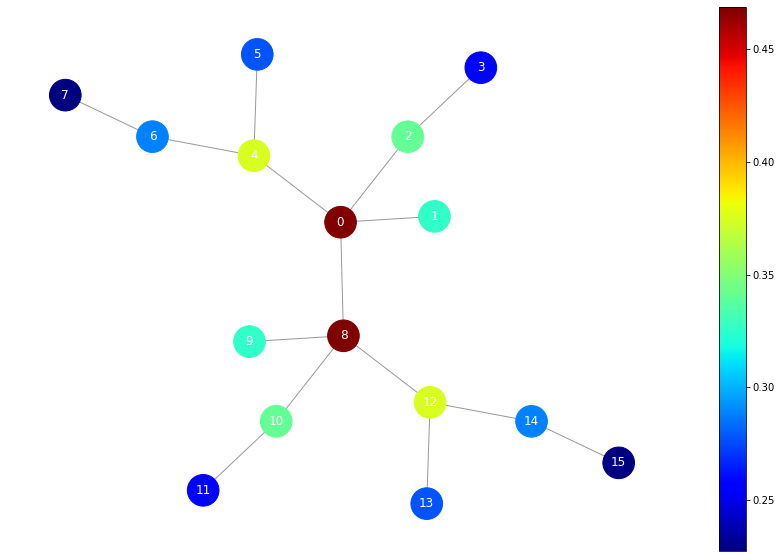

In [41]:
# gráfico da centralidade proximidade

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
# pos = nx.spring_layout(BTG,seed=123456789,k=0.3)
pos = nx.kamada_kawai_layout(BTG)

# color of nodes
color = list(cc.values())

# draw edges
nx.draw_networkx_edges(BTG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(BTG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(BTG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig('closeness_centrality.png', transparent=True,dpi=300)
plt.show()

In [42]:
set_cc = set(cc.values())
print("set_cc: ", set_cc)

for i in set_cc:
    print(i, end= " : ")
    for key, value in cc.items():
        if i == cc[key]:
            print(key, end=", ")
    print()

set_cc:  {0.46875, 0.32608695652173914, 0.25862068965517243, 0.3409090909090909, 0.375, 0.2777777777777778, 0.28846153846153844, 0.22727272727272727}
0.46875 : 0, 8, 
0.32608695652173914 : 1, 9, 
0.25862068965517243 : 3, 11, 
0.3409090909090909 : 2, 10, 
0.375 : 4, 12, 
0.2777777777777778 : 5, 13, 
0.28846153846153844 : 6, 14, 
0.22727272727272727 : 7, 15, 


### Centralidade harmônica

- Na **centralidade harmônica** a média aritmética das distâncias presente na **centralidade de proximidade** é substituida pela **média harmônica** das mesmas em que nós pertencentes a componentes distintas possuem distâncias infinitas entre si, ou seja,
$$
C_h(i) = \dfrac{1}{n-1} \left[ \sum_{j\not=i} \dfrac{1}{d(i,j)} \right] \; \forall \; i \in V
$$

- **nx.harmonic_centrality()**: função do networkx que retorna o centralidade harmônica de cada nó da rede, sem normalizar(sem dividor por $n-1$).

- A **centralidade harmônica** contorna o problema de redes com mais de uma componente conexas, onde temos distâncias geodésicas infinitas.

In [43]:
# centralidade harmônica
ch = nx.harmonic_centrality(BTG)

for key, value in ch.items():
    print("centralidade harmonica do nó", key, ":", value)

centralidade harmonica do nó 0 : 8.583333333333332
centralidade harmonica do nó 1 : 5.699999999999999
centralidade harmonica do nó 2 : 6.366666666666666
centralidade harmonica do nó 3 : 4.716666666666668
centralidade harmonica do nó 4 : 7.283333333333333
centralidade harmonica do nó 5 : 5.100000000000001
centralidade harmonica do nó 6 : 5.7666666666666675
centralidade harmonica do nó 7 : 4.35952380952381
centralidade harmonica do nó 8 : 8.583333333333334
centralidade harmonica do nó 9 : 5.699999999999999
centralidade harmonica do nó 10 : 6.366666666666666
centralidade harmonica do nó 11 : 4.716666666666667
centralidade harmonica do nó 12 : 7.283333333333333
centralidade harmonica do nó 13 : 5.1
centralidade harmonica do nó 14 : 5.766666666666667
centralidade harmonica do nó 15 : 4.359523809523809


In [44]:
set_ch = set(ch.values())
print("set_ch: ", set_ch)

for i in set_ch:
    print(i, end= " : ")
    for key, value in ch.items():
        if i == ch[key]:
            print(key, end=", ")
    print()

set_ch:  {4.716666666666668, 5.699999999999999, 6.366666666666666, 7.283333333333333, 8.583333333333332, 5.100000000000001, 5.7666666666666675, 4.35952380952381, 8.583333333333334, 4.716666666666667, 5.1, 4.359523809523809, 5.766666666666667}
4.716666666666668 : 3, 
5.699999999999999 : 1, 9, 
6.366666666666666 : 2, 10, 
7.283333333333333 : 4, 12, 
8.583333333333332 : 0, 
5.100000000000001 : 5, 
5.7666666666666675 : 6, 
4.35952380952381 : 7, 
8.583333333333334 : 8, 
4.716666666666667 : 11, 
5.1 : 13, 
4.359523809523809 : 15, 
5.766666666666667 : 14, 


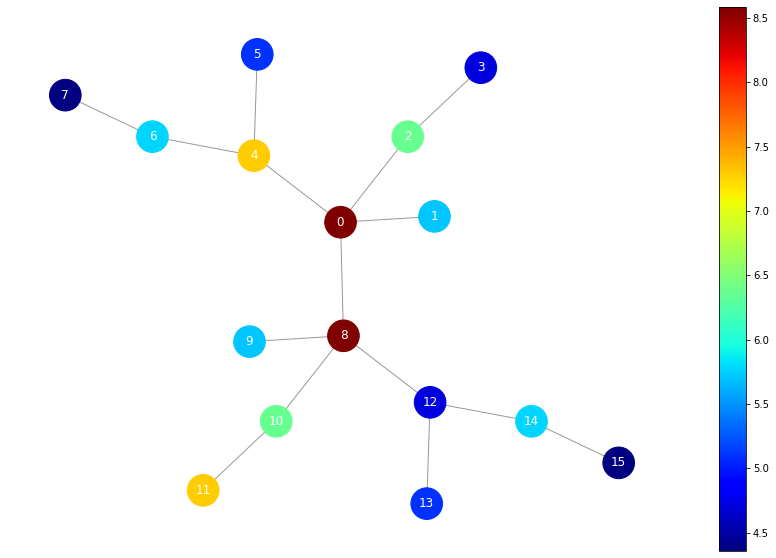

In [45]:
# grafico da centralidade harmônica (normalizada) do gráfico

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
# pos = nx.spring_layout(BTG,seed=123456789,k=0.3)
pos = nx.kamada_kawai_layout(BTG)

# color of nodes
color = list(ch.values())

# draw edges
nx.draw_networkx_edges(BTG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(BTG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(BTG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig('harmonic_centrality.png', transparent=True,dpi=300)
plt.show()

In [46]:
# centralidade harmônica normalizada do grafo(rede)
ch = dict(nx.harmonic_centrality(BTG))

chn = {}
for key, value in ch.items():
    chn[key] = value/(n-1)

for key, value in chn.items():
    print("centralidade harmônica normalizada do nó", key, ":", value)

centralidade harmônica normalizada do nó 0 : 0.5722222222222222
centralidade harmônica normalizada do nó 1 : 0.37999999999999995
centralidade harmônica normalizada do nó 2 : 0.4244444444444444
centralidade harmônica normalizada do nó 3 : 0.3144444444444445
centralidade harmônica normalizada do nó 4 : 0.4855555555555556
centralidade harmônica normalizada do nó 5 : 0.3400000000000001
centralidade harmônica normalizada do nó 6 : 0.3844444444444445
centralidade harmônica normalizada do nó 7 : 0.2906349206349207
centralidade harmônica normalizada do nó 8 : 0.5722222222222223
centralidade harmônica normalizada do nó 9 : 0.37999999999999995
centralidade harmônica normalizada do nó 10 : 0.4244444444444444
centralidade harmônica normalizada do nó 11 : 0.31444444444444447
centralidade harmônica normalizada do nó 12 : 0.4855555555555556
centralidade harmônica normalizada do nó 13 : 0.33999999999999997
centralidade harmônica normalizada do nó 14 : 0.3844444444444444
centralidade harmônica normaliz

In [47]:
set_chn = set(chn.values())
print("set_chn: ", set_chn)

for i in set_chn:
    print(i, end= " : ")
    for key, value in chn.items():
        if i == chn[key]:
            print(key, end=", ")
    print()

set_chn:  {0.5722222222222222, 0.4244444444444444, 0.4855555555555556, 0.37999999999999995, 0.3144444444444445, 0.3400000000000001, 0.3844444444444445, 0.2906349206349207, 0.5722222222222223, 0.31444444444444447, 0.33999999999999997, 0.29063492063492063, 0.3844444444444444}
0.5722222222222222 : 0, 
0.4244444444444444 : 2, 10, 
0.4855555555555556 : 4, 12, 
0.37999999999999995 : 1, 9, 
0.3144444444444445 : 3, 
0.3400000000000001 : 5, 
0.3844444444444445 : 6, 
0.2906349206349207 : 7, 
0.5722222222222223 : 8, 
0.31444444444444447 : 11, 
0.33999999999999997 : 13, 
0.29063492063492063 : 15, 
0.3844444444444444 : 14, 


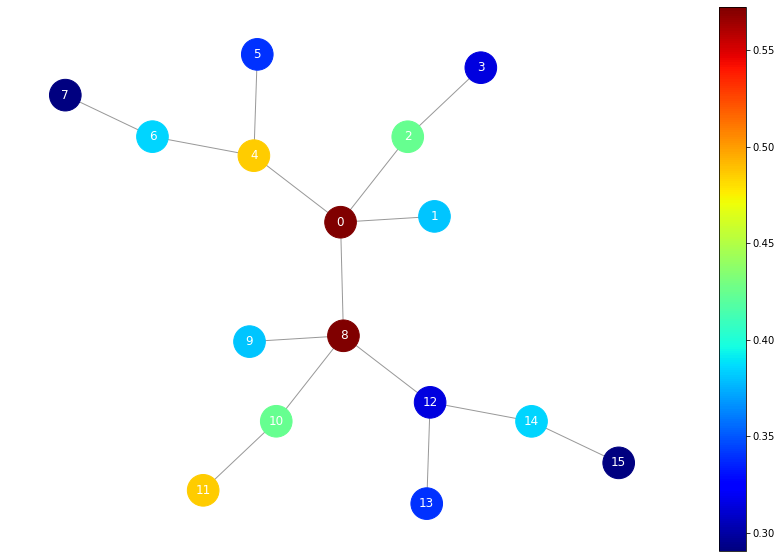

In [48]:
# grafico da centralidade harmônica normalizada do gráfico

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
# pos = nx.spring_layout(BTG,seed=123456789,k=0.3)
pos = nx.kamada_kawai_layout(BTG)

# color of nodes
color = list(chn.values())

# draw edges
nx.draw_networkx_edges(BTG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(BTG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(BTG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig('normal_harmonic_centrality.png', transparent=True,dpi=300)
plt.show()

### Centralidade de p-média

- A **centralidade de p-média** usa a noção de média generalizadas das distâncias.

- A **centralidade de p-média** generaliza as três médias anteriores: execentricidade, proximidade e harmônica.

- Fórmula da **centralidade de p-média**:

\begin{equation*}
C_{p}(i) = \left\{
\begin{matrix}
\left( \dfrac{\sum_{j \in  V_{i}-\{i\}} d(i,j)^p}{n-1} \right)^{\dfrac{-1}{p}}, \; se \; p \not= 0 \\
\left( \prod_{j \in V_{i}-\{i\}} d(i,j) \right)^{\dfrac{-1}{n-1}}, \; se \; p = 0 \\
\end{matrix}
\right.
\end{equation*}

In [49]:
# centralidade generalizada

n = BTG.number_of_nodes()

# valores de p
# linspace is an in-built function in Python's NumPy library. 
# It is used to create an evenly spaced sequence in a specified interval.
p = np.linspace(-1,1,n)

node = 1
# comprimento dos caminhos mais curtos desde nó 1
sp = np.array(list(nx.shortest_path_length(BTG,1).values()))

# centralidade generalizada para o nó 1
cp = np.zeros_like(p)
for k in range (p.shape[0]):
    if p[k]:
        cp[k] = np.mean(sp[1:]** p[k])**(-1.0/p[k])
    else :
        cp[k] = np.prod(sp[1:])**(-1.0/(sp.shape[0] - 1))

In [50]:
print(p)

[-1.         -0.86666667 -0.73333333 -0.6        -0.46666667 -0.33333333
 -0.2        -0.06666667  0.06666667  0.2         0.33333333  0.46666667
  0.6         0.73333333  0.86666667  1.        ]


In [51]:
print(sp)

[0 1 2 2 2 3 3 3 3 3 3 4 4 4 4 5]


In [52]:
print(nx.shortest_path(BTG,1))

{1: [1], 0: [1, 0], 2: [1, 0, 2], 4: [1, 0, 4], 8: [1, 0, 8], 3: [1, 0, 2, 3], 5: [1, 0, 4, 5], 6: [1, 0, 4, 6], 9: [1, 0, 8, 9], 10: [1, 0, 8, 10], 12: [1, 0, 8, 12], 7: [1, 0, 4, 6, 7], 11: [1, 0, 8, 10, 11], 13: [1, 0, 8, 12, 13], 14: [1, 0, 8, 12, 14], 15: [1, 0, 8, 12, 14, 15]}


In [53]:
print(nx.shortest_path_length(BTG,1))

{1: 0, 0: 1, 2: 2, 4: 2, 8: 2, 3: 3, 5: 3, 6: 3, 9: 3, 10: 3, 12: 3, 7: 4, 11: 4, 13: 4, 14: 4, 15: 5}


In [54]:
for i in range(len(cp)):
    print("cp node", i,":", cp[i])

cp node 0 : 0.37999999999999995
cp node 1 : 0.37505065610533195
cp node 2 : 0.3703336305966605
cp node 3 : 0.36584172591878134
cp node 4 : 0.36156665014958356
cp node 5 : 0.3574992953056002
cp node 6 : 0.35362999288435565
cp node 7 : 0.34994874153168587
cp node 8 : 0.3464454041399442
cp node 9 : 0.3431098736950303
cp node 10 : 0.33993220875042085
cp node 11 : 0.33690274052330776
cp node 12 : 0.3340121543269963
cp node 13 : 0.33125154843954424
cp node 14 : 0.3286124736332013
cp node 15 : 0.32608695652173914


In [55]:
set_cp = set(cp)
print("set_cp: ", set_cp)

for i in set_cp:
    print(i, end= " : ")
    for key in range(len(cp)):
        if i == cp[key]:
            print(key, end=", ")
    print()

set_cp:  {0.37999999999999995, 0.37505065610533195, 0.36584172591878134, 0.3703336305966605, 0.36156665014958356, 0.3574992953056002, 0.35362999288435565, 0.34994874153168587, 0.3464454041399442, 0.3431098736950303, 0.3286124736332013, 0.33993220875042085, 0.3340121543269963, 0.33125154843954424, 0.32608695652173914, 0.33690274052330776}
0.37999999999999995 : 0, 
0.37505065610533195 : 1, 
0.36584172591878134 : 3, 
0.3703336305966605 : 2, 
0.36156665014958356 : 4, 
0.3574992953056002 : 5, 
0.35362999288435565 : 6, 
0.34994874153168587 : 7, 
0.3464454041399442 : 8, 
0.3431098736950303 : 9, 
0.3286124736332013 : 14, 
0.33993220875042085 : 10, 
0.3340121543269963 : 12, 
0.33125154843954424 : 13, 
0.32608695652173914 : 15, 
0.33690274052330776 : 11, 


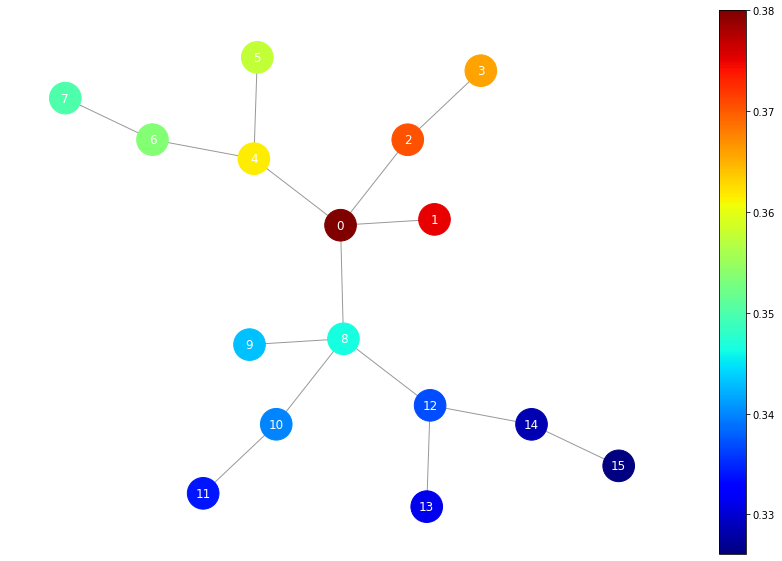

In [56]:
# centralidade generalizada

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
# pos = nx.spring_layout(BTG,seed=123456789,k=0.3)
pos = nx.kamada_kawai_layout(BTG)

# color of nodes
color = cp

# draw edges
nx.draw_networkx_edges(BTG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(BTG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(BTG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig('pmedia_centrality.png', transparent=True,dpi=300)
plt.show()

### Centralidade de intermediação

- A **centralidade de intermediação** quantifica o quanto os vértices são capazes de atuar como intermediários entre outros dois vértices, podendo portanto controlar o fluxo de informação entre eles.

- $Q_{j,k}$: número de caminhos geodésicos iniciando no vértice $j$ e terminando no vértice $k$.

- $Q_{j,k}(i)$: número de caminhos geodésicos que iniciam em $j$, terminam em $k$ e passam pelo vértice $i$.

- $\dfrac{Q_{j,k}(i)}{Q_{j,k}}$: determina a importância do vértice $i$ para a conexão entre $j$ e $k$. Quanto maioro valor, maior é a importância do vértice $i$ para a conexão entre $j$ e $k$.

- Fórmula da centralidade por intermediação

$$
C_{b}(i) = \dfrac{1}{(n-1)(n-2)} \left[ \sum_{(j,k):j\not=k, i \not\in \{ j,k\}} \dfrac{Q_{j,k}(i)}{Q_{j,k}} \right] \; \forall \; i \in V
$$

- Função do networkx: **nx.betweenness_centrality()**

In [57]:
# centralidade de intermediação
cb = nx.betweenness_centrality(BTG,normalized = True)

for key, value in cb.items():
    print("centralidade de intermediação do nó", key, ":", value)

centralidade de intermediação do nó 0 : 0.6666666666666667
centralidade de intermediação do nó 1 : 0.0
centralidade de intermediação do nó 2 : 0.13333333333333336
centralidade de intermediação do nó 3 : 0.0
centralidade de intermediação do nó 4 : 0.36190476190476195
centralidade de intermediação do nó 5 : 0.0
centralidade de intermediação do nó 6 : 0.13333333333333336
centralidade de intermediação do nó 7 : 0.0
centralidade de intermediação do nó 8 : 0.6666666666666667
centralidade de intermediação do nó 9 : 0.0
centralidade de intermediação do nó 10 : 0.13333333333333336
centralidade de intermediação do nó 12 : 0.36190476190476195
centralidade de intermediação do nó 11 : 0.0
centralidade de intermediação do nó 13 : 0.0
centralidade de intermediação do nó 14 : 0.13333333333333336
centralidade de intermediação do nó 15 : 0.0


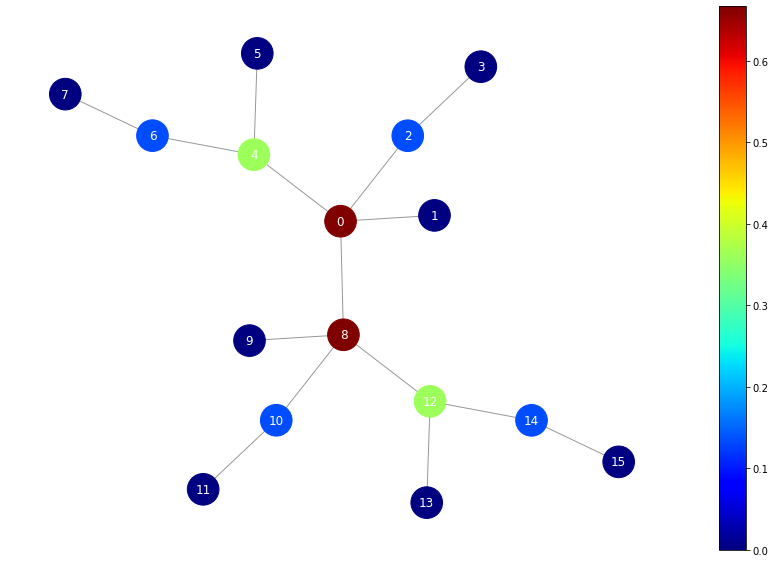

In [58]:
### gráfico da centralidade de intermediação

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
# pos = nx.spring_layout(BTG,seed=123456789,k=0.3)
pos = nx.kamada_kawai_layout(BTG)

# color of nodes
color = list(cb.values())

# draw edges
nx.draw_networkx_edges(BTG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(BTG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(BTG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig('cb.png', transparent=True,dpi=300)
plt.show()

In [59]:
set_cb = set(cb.values())
print("set_cb: ", set_cb)
set_cp = set(cp)
print("set_cp: ", set_cp)

for i in set_cp:
    print(i, end= " : ")
    for key in range(len(cp)):
        if i == cp[key]:
            print(key, end=", ")
    print()
for i in set_cb:
    print(i, end= " : ")
    for key, value in cb.items():
        if i == cb[key]:
            print(key, end=", ")
    print()

set_cb:  {0.6666666666666667, 0.0, 0.36190476190476195, 0.13333333333333336}
set_cp:  {0.37999999999999995, 0.37505065610533195, 0.36584172591878134, 0.3703336305966605, 0.36156665014958356, 0.3574992953056002, 0.35362999288435565, 0.34994874153168587, 0.3464454041399442, 0.3431098736950303, 0.3286124736332013, 0.33993220875042085, 0.3340121543269963, 0.33125154843954424, 0.32608695652173914, 0.33690274052330776}
0.37999999999999995 : 0, 
0.37505065610533195 : 1, 
0.36584172591878134 : 3, 
0.3703336305966605 : 2, 
0.36156665014958356 : 4, 
0.3574992953056002 : 5, 
0.35362999288435565 : 6, 
0.34994874153168587 : 7, 
0.3464454041399442 : 8, 
0.3431098736950303 : 9, 
0.3286124736332013 : 14, 
0.33993220875042085 : 10, 
0.3340121543269963 : 12, 
0.33125154843954424 : 13, 
0.32608695652173914 : 15, 
0.33690274052330776 : 11, 
0.6666666666666667 : 0, 8, 
0.0 : 1, 3, 5, 7, 9, 11, 13, 15, 
0.36190476190476195 : 4, 12, 
0.13333333333333336 : 2, 6, 10, 14, 


### k-shell

- O valor do **k-shell** está relacionado com a centralidade de grau dos nós e consiste na decomposição da rede em camadas.

- Os nós que possuem grau zero são nós isolados, constituem a camada $k = 0$ da rede.

- Os nós que possuem grau $k$, fazem parte da camada $k$ da rede.

- O maior valor de camada de uma rede é denotado por **kmax** e é também uma medida global da rede. 

- A união de todos os nós que fazem parte de uma camada maior ou igual a $k$ constitui o **$k$-core** da rede.

- A união de todos os nós que fazem parte de uma camada menor ou igual a $k$ constitui o **$k$-crust** da rede. 

Funções do networkx:

- **nx.core_number()**: retorna o índice de shell de cada nó, isto é, o número do maior k-core que cada nó pertence.

- **nx.k_shell()**: retorna o subgrafo com os nós em um $k$-shell.

- **nx.k_core()**: retorna o subgrafo com todos os nós em um $k$-core.

 - **nx.k_crust()**: retorna o subgrafo com todos os nós em um $k$-crust.

In [60]:
# Exemplo 2.8
G = nx.Graph()
G.add_nodes_from(range(15))
G.add_edges_from([(0,1),(0,2),(0,3),(1,2),(1 ,3),(2 ,3)])
G.add_edge(3,4)
G.add_edges_from([(4,5),(4,6),(4,7)])
G.add_edge(3,8)
G.add_edge(2,9)
G.add_edges_from([(1,10),(2,10),(10,11)])
G.add_edges_from([(1,12),(1,13),(12,13)])

In [61]:
print("number of nodes=", nx.number_of_nodes(G))
print("number of edges=", nx.number_of_edges(G))

number of nodes= 15
number of edges= 18


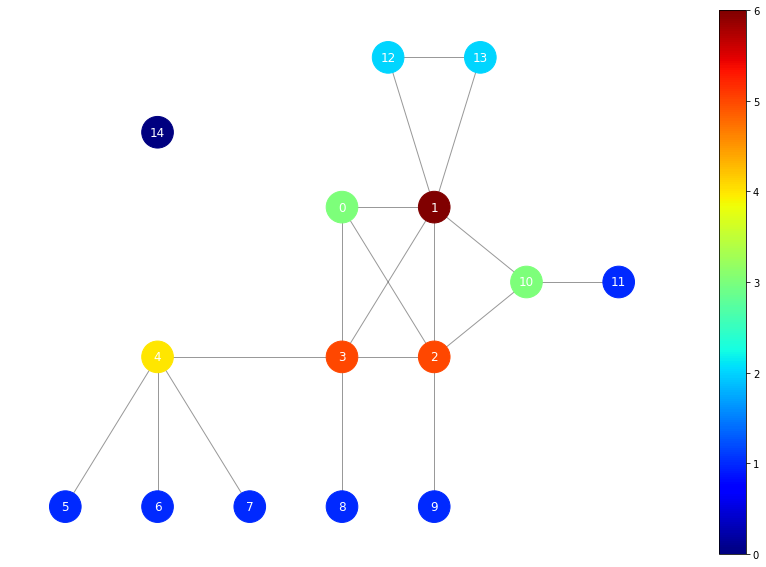

In [62]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position

#pos = nx.spring_layout(G,seed=123456789,k=0.3)

pos = nx.circular_layout(G)
pos[0] = [0.00,0.00]
pos[1] = [0.50,0.00]
pos[2] = [0.50,-0.50]
pos[3] = [0.00,-0.50]
pos[4] = [-1.00,-0.50]
pos[5] = [-1.50,-1.00]
pos[6] = [-1.00,-1.00]
pos[7] = [-0.50,-1.00]
pos[8] = [0.00,-1.00]
pos[9] = [0.50,-1.00]
pos[10] = [1.00,-0.25]
pos[11] = [1.50,-0.25]
pos[12] = [0.25,0.50]
pos[13] = [0.75,0.50]
pos[14] = [-1.00,0.25]

# color of nodes
color = list(dict(nx.degree(G)).values())

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               pos=pos,
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G,
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig('graphG.png', transparent=True, dpi=300)
plt.show()

In [63]:
# k-core of the network
set([v for k,v in nx.core_number(G).items()])

{0, 1, 2, 3}

In [64]:
for key, value in nx.core_number(G).items():
    print("core do nó", key, ":", value)

core do nó 0 : 3
core do nó 1 : 3
core do nó 2 : 3
core do nó 3 : 3
core do nó 4 : 1
core do nó 5 : 1
core do nó 6 : 1
core do nó 7 : 1
core do nó 8 : 1
core do nó 9 : 1
core do nó 10 : 2
core do nó 11 : 1
core do nó 12 : 2
core do nó 13 : 2
core do nó 14 : 0


In [65]:
# Visualize the nodes in k-core
# Note that k-core is the all network
k = 2
print(k, "core:", list(nx.k_core(G,k)))

2 core: [0, 1, 2, 3, 10, 12, 13]


In [66]:
# Visualize the nodes in k-shell
# Note that vertices in k-shell are member of k-core, 
# however they are not member of (k+1)-core
k = 2
print(k, "shell:", list(nx.k_shell(G, k)))

2 shell: [10, 12, 13]


In [67]:
# Visualize the nodes in k-crust
k = 2
print(k, "crust:", list(nx.k_crust(G, k)))

2 crust: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


NameError: name 'kc' is not defined

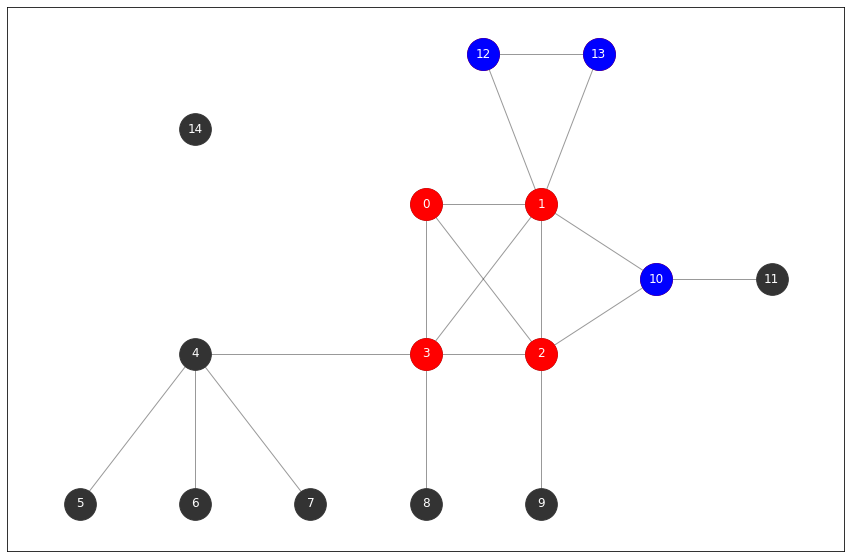

In [68]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

# Find k-cores and k-shell
ks = 2
k = 2
k_shell = nx.k_shell(G, ks)
k_core = nx.k_core(G, k)

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               pos=pos,
                               node_size=1000,
                               node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(k_core,
                               pos=pos,
                               node_size=1000,
                               node_color="red")

# draw nodes
nodes = nx.draw_networkx_nodes(k_shell,
                               pos=pos,
                               node_size=1000,
                               node_color="blue")

# draw labels
nx.draw_networkx_labels(G,
                        pos=pos,
                        font_color='white', 
                        ax=ax)

# static legend
red_patch = mpatches.Patch(color='red', label=f'{kc}-core')
blue_patch = mpatches.Patch(color='blue', label=f'{ks}-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
#plt.savefig('k_core_G', transparent=True,dpi=600)
plt.show()

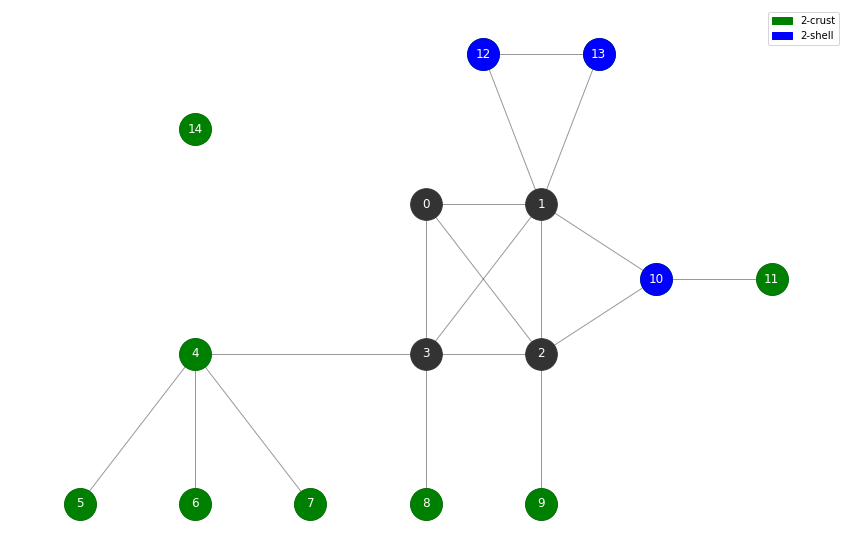

In [69]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

# Find k-crust and k-shell
ks = 2
k = 2
k_shell = nx.k_shell(G, ks)
k_crust = nx.k_crust(G, k)

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               pos=pos,
                               node_size=1000,
                               node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(k_crust,
                               pos=pos,
                               node_size=1000,
                               node_color="green")

# draw nodes
nodes = nx.draw_networkx_nodes(k_shell,
                               pos=pos,
                               node_size=1000,
                               node_color="blue")

# draw labels
nx.draw_networkx_labels(G,
                        pos=pos,
                        font_color='white', 
                        ax=ax)

# static legend
green_patch = mpatches.Patch(color='green', label=f'{k}-crust')
blue_patch = mpatches.Patch(color='blue', label=f'{ks}-shell')
plt.legend(handles=[green_patch,blue_patch])

plt.axis("off")
#plt.savefig('k_crust_shell_G', transparent=True,dpi=600)
plt.show()

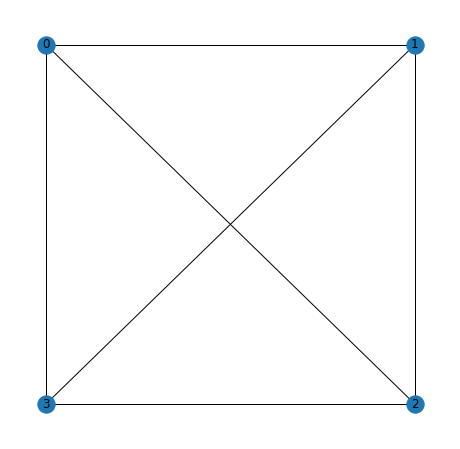

In [70]:
# Subgrafos de shells e de cores
fig, ax = plt.subplots(1,1,figsize=(8,8))

ks = 3
G_shell = nx.core.k_shell(G,ks)
nx.draw(G_shell, pos, with_labels = True)

plt.axis("off")
plt.show()

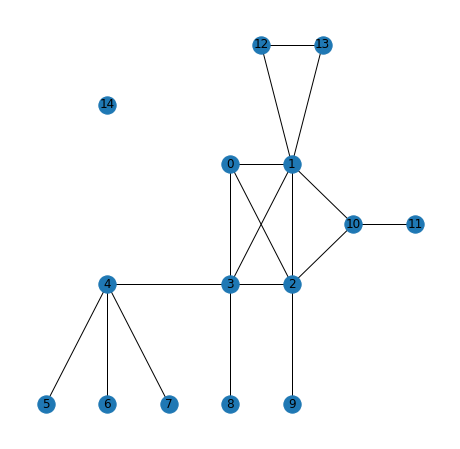

In [71]:
# Subgrafos de shells e de cores

fig, ax = plt.subplots(1,1,figsize=(8,8))

kc = 0 # core number
G_shell = nx.core.k_core(G,kc)
nx.draw(G_shell, pos, with_labels = True)

plt.axis("off")
plt.show()

### Centralidade de Autovetor

- A centralidade de autovetor é uma medida que leva em conta não somente a quantidade de vizinhos que um vértice possui, mas também a importância destes vizinhos.

- Seja $C_{eg}^{0} = ( C_{eg}^{0}(1), C_{eg}^{0}(2), \ldots, C_{eg}^{0}(n) ) \geq 0$ um vetor do valor inicial de importância dos nós da rede.

- Podemos atualizer a importância do nó $i$ da rede, somando a importância dos seus vizinhos, ou seja,
$
C_{eg}^{1} (i) = \sum_{j=1}^{n} A(i,j) C_{eg}^{0}(j).
$

- Temos que $C_{eg}^{1} = A C_{eg}^{0}$, e repetindo $x$ vezes temos $C_{eg}^{x} = A^{x} C_{eg}^{0}$.

- Considere $C_{eq}^{0} = \sum_{i=1}^{n} b_i v_i$, onde $v_i$ é o autovetor $i$ da matriz $A$. Temos então
\begin{align*}
C_{eg}^{x} & = A^{x} \sum_{i} b_{i} v_{i} \\
& = \sum_{i} b_i A^{x} v_i \\
& = \sum_{i} b_i (\lambda_i)^{x} v_{i} \\
& = (\lambda_{1})^{x} \sum_{i} b_i \left( \dfrac{\lambda_{i}}{\lambda_{1}} \right)^{x} v_{i}
\end{align*}
onde $\lambda_1 = \max_{i} { |\lambda_{i}|}$ 

- A centralidade de autovetor é definida como um vetor que satisfaz $AC_{eg} = \lambda_{1} C_{eg}$

- Temos que $C_{eg}(i) = \dfrac{1}{\lambda_{1}} \sum_{j=1}^{n} A(i,j) C_{eg} (j)$ para cada nó $i$ da rede.


In [72]:
graus = dict(nx.degree(BTG))

for k, val in graus.items():
    print("node",k,":", val)

node 0 : 4
node 1 : 1
node 2 : 2
node 3 : 1
node 4 : 3
node 5 : 1
node 6 : 2
node 7 : 1
node 8 : 4
node 9 : 1
node 10 : 2
node 12 : 3
node 11 : 1
node 13 : 1
node 14 : 2
node 15 : 1


In [76]:
cev = nx.eigenvector_centrality_numpy(BTG)

for k, val in cev.items():
    print("node",k,":", val)

node 0 : 0.5039067316829228
node 1 : 0.20189023941097928
node 2 : 0.2404945249862262
node 3 : 0.09635413494942337
node 4 : 0.3114314873399204
node 5 : 0.12477502995283933
node 6 : 0.1486337905497493
node 7 : 0.05955013035533817
node 8 : 0.5039067316829218
node 9 : 0.20189023941097908
node 10 : 0.2404945249862261
node 12 : 0.3114314873399186
node 11 : 0.09635413494942262
node 13 : 0.12477502995283898
node 14 : 0.14863379054974857
node 15 : 0.05955013035533697


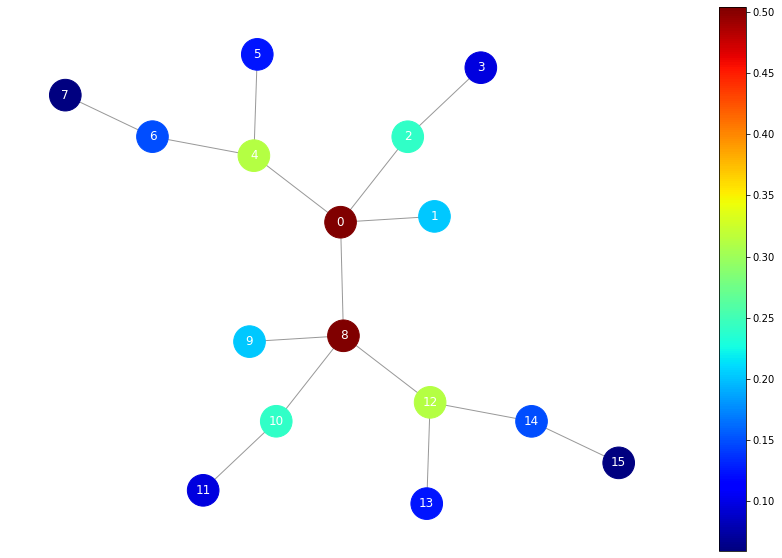

In [73]:
# centralidade de autovetor

cev = list(nx.eigenvector_centrality_numpy(BTG).values())

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
pos = nx.kamada_kawai_layout(BTG)

# color of nodes
color = cev

# draw edges
nx.draw_networkx_edges(BTG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(BTG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(BTG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

### Exemplo: grafo de Erdõs Rényi

In [ ]:
# grafo aleatório de Erdös - Rényi com 100 nós e probabilidade 0.1

ERG = nx.erdos_renyi_graph(100,0.1)
n = ERG.number_of_nodes()
m = ERG.number_of_edges()

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
# pos = nx.spring_layout(BTG,seed=123456789,k=0.3)
pos = nx.kamada_kawai_layout(ERG)

# draw edges
nx.draw_networkx_edges(ERG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(ERG, 
                               pos=pos, 
                               node_size=1000,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(ERG, 
                        pos=pos,
                        font_color='white',
                        ax=ax)

plt.axis("off")
plt.show()

In [ ]:
print(nx.is_connected(ERG))

In [ ]:
print("aresta: ", nx.number_of_edges(ERG))

In [ ]:
# Graus dos vertices
graus = dict(nx.degree(ERG))

for key, value in graus.items():
    print("grau do nó", key, ":", value)

In [ ]:
print(set(graus.values()))

In [ ]:
# Graus de centralidade
grau_center = nx.degree_centrality(ERG)

for key, value in grau_center.items():
    print("grau de centralidade do nó ", key, ":", value)

In [ ]:
print(set(grau_center.values()))

In [ ]:
ec = nx.eccentricity(ERG)

for key, value in ec.items():
    print("excentricidade do nó",key,":", value)


In [ ]:
print(set(ec.values()))

In [ ]:
# gráfico da excentricidade de G

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
#pos = nx.spring_layout(ERG,seed=123456789,k=0.3)
pos = nx.kamada_kawai_layout(ERG)

# color of nodes based on eccentricity
color = list(ec.values())

# draw edges
nx.draw_networkx_edges(ERG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(ERG,
                               node_size=1000,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(ERG, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig('excentricidade.png', transparent=True,dpi=300)
plt.show()

In [ ]:
# centralidade de excentricidade
cec = [1.0/ec[i] for i in ec]

#for key, value in ec.items():
#    print("node",key,":", cec[key])

In [ ]:
# centralidade de excentricidade

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
pos = nx.kamada_kawai_layout(ERG)

# color of nodes
color = list(cec)

# draw edges
nx.draw_networkx_edges(ERG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(ERG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(ERG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [ ]:
# centralidade de proximidade
cc = nx.closeness_centrality(ERG)

#for key, value in cc.items():
#    print("node",key,":", value)

In [ ]:
# centralidade de proximidade

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
pos = nx.kamada_kawai_layout(ERG)

# color of nodes
color = list(cc.values())

# draw edges
nx.draw_networkx_edges(ERG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)
# Find k-crust e k-shell

# draw nodes
nodes = nx.draw_networkx_nodes(ERG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(ERG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [ ]:
# centralidade harmônica
n = nx.number_of_nodes(ERG)
ch = nx.harmonic_centrality(ERG)
chn = [ x /(n - 1) for x in ch] # normalização

#for key, value in ec.items():
#    print("node",key,":", ch[key])

In [ ]:
print(set(ch.values()))

In [ ]:
# centralidade harmonica

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
pos = nx.kamada_kawai_layout(ERG)

# color of nodes
color = list(chn)

# draw edges
nx.draw_networkx_edges(ERG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(ERG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(ERG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [ ]:
# centralidade generalizada

# valores de p
p = np.linspace(-1,50,100)

# comprimento dos caminhos mais curtos desde nó 1
sp = np.array(list(nx.shortest_path_length(ERG,1).values()))

# centralidade generalizada para o nó 1
cp = np.zeros_like(p)

for k in range(p.shape[0]):
    if p[k]:
        cp[k] = np.mean(sp[1:]** p[k])**(-1.0/p[k])
    else :
        cp[k] = np.prod(sp[1:])**(-1.0/(sp.shape[0] - 1))

In [ ]:
for k in range(p.shape[0]):
    print("centralidade generalizada do nó %d: %f" %(k,cp[k]))

In [ ]:
# centralidade de proximidade

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
pos = nx.kamada_kawai_layout(ERG)

# color of nodes
color = cp

# draw edges
nx.draw_networkx_edges(ERG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(ERG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(ERG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [10]:
ERG = nx.erdos_renyi_graph(1000,0.01)
graus = dict(nx.degree(ERG))

for k, val in graus.items():
    print("node",k,":", val)

node 0 : 16
node 1 : 8
node 2 : 9
node 3 : 3
node 4 : 11
node 5 : 12
node 6 : 13
node 7 : 6
node 8 : 6
node 9 : 12
node 10 : 15
node 11 : 13
node 12 : 7
node 13 : 8
node 14 : 8
node 15 : 6
node 16 : 10
node 17 : 12
node 18 : 16
node 19 : 8
node 20 : 7
node 21 : 13
node 22 : 11
node 23 : 10
node 24 : 11
node 25 : 12
node 26 : 9
node 27 : 13
node 28 : 15
node 29 : 8
node 30 : 17
node 31 : 5
node 32 : 10
node 33 : 14
node 34 : 6
node 35 : 11
node 36 : 6
node 37 : 10
node 38 : 9
node 39 : 7
node 40 : 8
node 41 : 9
node 42 : 5
node 43 : 14
node 44 : 10
node 45 : 9
node 46 : 11
node 47 : 15
node 48 : 11
node 49 : 11
node 50 : 9
node 51 : 12
node 52 : 10
node 53 : 11
node 54 : 14
node 55 : 8
node 56 : 7
node 57 : 10
node 58 : 1
node 59 : 9
node 60 : 12
node 61 : 10
node 62 : 10
node 63 : 11
node 64 : 7
node 65 : 19
node 66 : 11
node 67 : 7
node 68 : 8
node 69 : 6
node 70 : 7
node 71 : 16
node 72 : 12
node 73 : 8
node 74 : 11
node 75 : 13
node 76 : 3
node 77 : 9
node 78 : 9
node 79 : 11
node 8

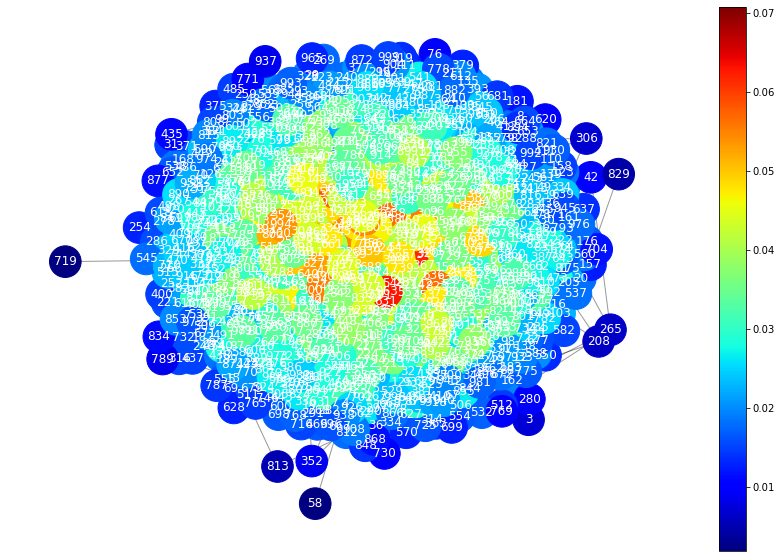